# K-means clustering

Please note that I used the following book as a guide: 

#### Machine Learning for Absolute Beginners: A Plain English Introduction (Second Edition) by Oliver Theobald
    
The model constructed below are based on the explanations provided in the book. 

   - One of the most popular unsupervised learning algorithms. 
   - Essentially this is the division of data into "k" clusters based on similar features. 
   - Select a centroid for each cluster 
   
Use Expectation-Maximization to estimate the centroids (cluster centers). So it is very similar to any other iterative method such as Jacobi, Gauss-Seidel, Gradient Descent, etc. where you pick a random point and choose a new point that is much closer to the actual answer. Repeat the process until it converges into a single value.


In [1]:
import pandas as pd
import numpy as np
import math
import collections
import matplotlib.pyplot as plt
# for comparison purposes
from sklearn.cluster import KMeans 

### Step 1: Generate Random Data
There will be two datasets to test the model against.

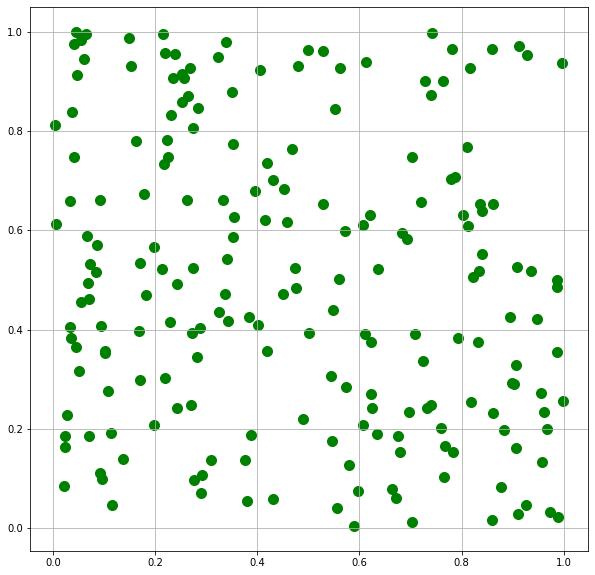

In [2]:
# random data
x1 = np.random.rand(100,2)
y1 = np.random.rand(100,2)

figure = plt.figure(figsize=(10,10))
plt.scatter(x1,y1,color='green',s=100)
plt.grid()
plt.show()

### Step 2: Check EXPECTED Results
Use sklearn. Technically, this will be our guidemap as we construct the hand-made model.

In [3]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=4)
Kmean.fit(x1)
centers1 = Kmean.cluster_centers_
print(centers1)

[[0.19015859 0.76544353]
 [0.22595247 0.26527841]
 [0.76988327 0.21924645]
 [0.75895861 0.773093  ]]


### Step 3: Construct the model


In [4]:
# use this function to determine how close two points are
# to each other.
def euclidean_distance(p1, p2):
    x = p2[0]-p1[0]
    y = p2[1]-p1[1]
    x = x*x
    y = y*y
    x_y= x + y
    return math.sqrt(x_y)

In [5]:
def kmeans(data):
    # let's pretend we are only looking for 4 clusters.
    clusters = 4 
    # step 1: choose a random cluster
    centers = []
    initial_clusters = np.random.rand(clusters,2)
    for centroid in initial_clusters:
        centers.append(centroid)
    
    # step 2: iterate using expectation maximization
    go_lang = True
    iterations = 0
    while go_lang:
        # Compute euclidean distance between centroids
        # assign a point to a centroid based on how close
        # it is to the centroid
        point_centroid_list = []
        number_of_points_per_cluster = [0] * len(centers)
        for point in data:
            distances = []
            for centroid in centers:
                distances.append(euclidean_distance(point, centroid))
            distance_to_nearest_centroid = min(distances)
            index = distances.index(distance_to_nearest_centroid)
            # assign the point to the centroid
            number_of_points_per_cluster[index] += 1
            point_centroid_list.append([point, centers[index], index])
        # take the mean value of the datapoints in each 
        # cluster, and update the centroid coordinates.
        new_centers = [(0,0)] * len(centers)
        for entry in point_centroid_list:
            new_centers[entry[2]] = [x + y for x, y in zip(new_centers[entry[2]], entry[0])]
        # let's kick it old school. i and j counter variables!
        for i in range(len(new_centers)):
            for j in range(len(new_centers[i])):
                new_centers[i][j] = new_centers[i][j] / number_of_points_per_cluster[i]
        iterations += 1
        # check for convergence!
        if np.array_equal(centers, new_centers):
            print('Finished in {} iterations!'.format(iterations))
            go_lang = False
        else:
            centers = new_centers
    return np.asarray(centers), np.asarray(point_centroid_list)[:,2], clusters

We now our have our lovingly made nearly manually coded K means function. Let's try it out on our dataset and compare it with
the result of the Kmeans function from sklearn.

In [6]:
# results from sklearn Kmeans function:
centers1

array([[0.19015859, 0.76544353],
       [0.22595247, 0.26527841],
       [0.76988327, 0.21924645],
       [0.75895861, 0.773093  ]])

In [7]:
# our results.
results1 = kmeans(x1)
print("FINAL CENTROIDS")
print(results1[0])
print("CLUSTER LABELS")
print(results1[1])
print("K CLUSTERS")
print(results1[2])

Finished in 7 iterations!
FINAL CENTROIDS
[[0.75895861 0.773093  ]
 [0.76988327 0.21924645]
 [0.23055026 0.25721637]
 [0.18609434 0.75434496]]
CLUSTER LABELS
[0 1 0 1 1 2 2 1 2 0 3 3 0 1 2 3 3 2 2 3 2 0 3 2 1 1 1 0 1 3 3 2 1 3 3 1 0
 2 1 0 0 0 0 3 0 3 0 2 3 1 2 0 2 1 1 2 0 2 2 3 1 3 2 3 0 2 1 2 3 2 3 1 0 2
 1 2 1 1 1 2 2 0 2 2 1 3 0 3 3 1 3 3 1 2 3 2 1 2 0 1]
K CLUSTERS
4


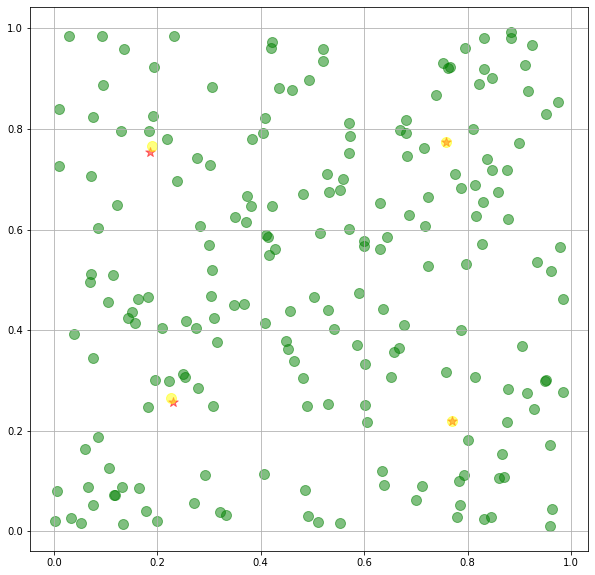

In [18]:
# visualize centroids
x1 = np.random.rand(100,2)
y1 = np.random.rand(100,2)

figure = plt.figure(figsize=(10,10))
plt.scatter(x1,y1,color='green',s=100, alpha=0.5)
plt.scatter(results1[0][:,0], results1[0][:,1], color='red',s=100, alpha=0.5, marker='*')
plt.scatter(centers1[:,0], centers1[:,1], color='yellow',s=100, alpha=0.5)
plt.grid()
plt.show()

## Conclusion
The red dots represent the centroids produced from my function.
The yellow dots represent the centroids produced from the
sklearn Kmeans function.

Great, based on the results, my Kmeans function got very similar results as the sklearn Kmeans function. :)